### Importing Requisite Libraries

In [1]:
import nba_api
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import py_ball
from py_ball import league, image, player, boxscore, league_dash, synergy, leaderboard
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Creating Request Header for API Call

In [2]:
HEADERS = {'Connection': 'keep-alive',
           'Host': 'stats.nba.com',
           'Origin': 'http://stats.nba.com',
           'Upgrade-Insecure-Requests': '1',
           'Referer': 'stats.nba.com',
           'x-nba-stats-origin': 'stats',
           'x-nba-stats-token': 'true',
           'Accept-Language': 'en-US,en;q=0.9',
           "X-NewRelic-ID": "VQECWF5UChAHUlNTBwgBVw==",
           'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6)' +\
                         ' AppleWebKit/537.36 (KHTML, like Gecko)' + \
                         ' Chrome/81.0.4044.129 Safari/537.36'}

### Pulling "Touches" Data into DataFrame

In [3]:
touches = league_dash.LeagueDash(headers = HEADERS, endpoint = 'leaguedashptstats', season = "2022-23", player_or_team = "Player", pt_measure_type = "Possessions", date_to = "11/29/2022")
touches_data = touches.data["LeagueDashPtStats"]
touches_df = pd.DataFrame(touches_data)
touches_df.sort_values("TIME_OF_POSS", ascending = False)

# Isolating Necessary Columns
touches_df = touches_df[["PLAYER_NAME", "TIME_OF_POSS", "TEAM_ABBREVIATION"]]
touches_df = touches_df[touches_df["TIME_OF_POSS"] <= 5]
touches_df

,PLAYER_NAME,TIME_OF_POSS,TEAM_ABBREVIATION
0,A.J. Lawson,0.0,DAL
1,AJ Green,0.4,MIL
2,AJ Griffin,0.6,ATL
3,Aaron Gordon,1.8,DEN
4,Aaron Holiday,1.5,ATL
5,Aaron Nesmith,0.8,IND
6,Aaron Wiggins,0.8,OKC
7,Admiral Schofield,0.5,ORL
8,Al Horford,1.3,BOS
9,Alec Burks,2.0,DET


### Importing "Assists" Data Scraped from Basketball Reference into DataFrame

In [4]:
ast_df = pd.read_csv("//Users//yashwant//Downloads//22-23AST_BBallRef.csv")
del ast_df["Rk"]
ast_df

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST,STL%,BLK%,TOV%,USG%,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,Tyrese Haliburton,PG,22.0,IND,20.0,675.0,23.7,0.595,0.463,0.195,2.7,12.3,7.5,52.4,2.5,0.8,13.7,23.6,NaN,2.3,0.7,3.0,0.214,NaN,6.5,0.7,7.2,1.6
1,Luka Dončić,PG,23.0,DAL,19.0,710.0,31.4,0.605,0.338,0.493,3.0,25.7,14.2,46.9,2.5,1.3,11.5,38.0,NaN,2.7,1.2,3.9,0.262,NaN,8.2,2.8,10.9,2.3
2,Nikola Jokić,C,27.0,DEN,17.0,544.0,31.2,0.700,0.147,0.476,7.0,28.3,17.6,43.5,2.0,1.7,16.4,26.5,NaN,2.8,0.7,3.5,0.304,NaN,7.7,3.5,11.3,1.8
3,Trae Young,PG,24.0,ATL,20.0,708.0,22.0,0.543,0.332,0.401,2.5,6.4,4.5,42.0,1.1,0.4,12.1,34.4,NaN,1.4,0.5,1.8,0.124,NaN,5.7,-2.0,3.7,1.0
4,Russell Westbrook,PG,34.0,LAL,18.0,508.0,14.7,0.498,0.311,0.299,3.8,14.9,9.5,39.7,1.7,1.3,19.8,28.5,NaN,-0.5,0.6,0.1,0.014,NaN,-0.6,-0.5,-1.1,0.1
5,Ja Morant,PG,23.0,MEM,17.0,560.0,25.7,0.570,0.228,0.438,4.1,16.5,10.2,39.6,1.5,0.8,13.1,35.9,NaN,1.5,0.5,2.0,0.172,NaN,6.1,0.4,6.5,1.2
6,Darius Garland,PG,23.0,CLE,15.0,538.0,19.5,0.578,0.406,0.318,1.1,6.2,3.7,36.9,1.9,0.7,14.9,28.8,NaN,1.0,0.7,1.7,0.154,NaN,4.3,-0.6,3.6,0.7
7,Jrue Holiday,PG,32.0,MIL,15.0,475.0,18.0,0.533,0.393,0.166,4.3,11.9,8.2,36.8,2.4,1.3,16.9,26.1,NaN,0.4,0.8,1.2,0.119,NaN,1.8,0.6,2.4,0.5
8,Mike Conley,PG,35.0,UTA,17.0,497.0,14.9,0.534,0.561,0.230,1.5,7.5,4.5,35.3,1.9,0.8,13.3,15.9,NaN,1.1,0.3,1.4,0.131,NaN,1.3,-0.1,1.2,0.4
9,Stephen Curry,PG,34.0,GSW,20.0,694.0,28.5,0.682,0.571,0.259,2.0,18.9,10.7,34.5,1.5,0.5,11.4,31.4,NaN,3.0,0.7,3.7,0.255,NaN,9.6,0.9,10.5,2.2


### Merging the 2 DataFrames into One Large DataFrame, Merging by Name

In [5]:
connectors_df = pd.merge(touches_df, ast_df, left_on = "PLAYER_NAME", right_on = "Player")
connectors_df.sort_values("AST", ascending = False)

,PLAYER_NAME,TIME_OF_POSS,TEAM_ABBREVIATION,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST,STL%,BLK%,TOV%,USG%,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
113,Marcus Smart,4.1,BOS,Marcus Smart,PG,28.0,BOS,19.0,613.0,13.6,0.572,0.548,0.198,1.0,9.6,5.4,30.7,1.6,0.8,17.2,16.8,NaN,1.0,0.5,1.5,0.120,NaN,-0.1,-0.3,-0.4,0.2
42,Draymond Green,2.2,GSW,Draymond Green,PF,32.0,GSW,20.0,613.0,13.9,0.651,0.203,0.268,2.3,19.1,11.0,29.8,1.4,2.1,25.9,12.7,NaN,1.0,0.7,1.7,0.130,NaN,-0.7,2.1,1.4,0.5
112,Malik Monk,1.8,SAC,Malik Monk,SG,24.0,SAC,19.0,429.0,18.4,0.606,0.510,0.194,2.2,8.6,5.5,28.7,1.3,0.8,13.2,25.6,NaN,0.8,0.2,1.1,0.119,NaN,2.9,-1.4,1.5,0.4
10,Ben Simmons,3.5,BKN,Ben Simmons,PG,26.0,BRK,17.0,477.0,14.9,0.615,0.010,0.327,4.3,21.7,13.5,28.6,2.2,2.2,25.2,14.6,NaN,0.6,0.7,1.3,0.126,NaN,-1.5,2.2,0.7,0.3
77,Jimmy Butler,4.6,MIA,Jimmy Butler,SF,33.0,MIA,13.0,464.0,24.0,0.617,0.176,0.574,6.3,15.1,10.6,28.0,2.4,0.6,9.1,23.0,NaN,1.7,0.7,2.3,0.243,NaN,4.8,1.7,6.4,1.0
39,Domantas Sabonis,2.9,SAC,Domantas Sabonis,PF,26.0,SAC,19.0,620.0,21.5,0.650,0.111,0.571,8.1,31.2,19.8,27.8,1.1,1.2,16.2,20.4,NaN,2.0,0.7,2.6,0.202,NaN,2.7,2.0,4.7,1.0
103,Killian Hayes,3.9,DET,Killian Hayes,PG,21.0,DET,23.0,543.0,8.7,0.419,0.325,0.099,2.1,10.2,6.0,27.7,2.3,1.6,16.0,18.5,NaN,-0.6,0.2,-0.4,-0.033,NaN,-4.1,-0.2,-4.3,-0.3
86,Josh Giddey,4.3,OKC,Josh Giddey,SG,20.0,OKC,18.0,546.0,12.6,0.499,0.219,0.113,5.2,20.0,12.3,26.7,0.7,1.3,19.5,24.6,NaN,-0.5,0.5,-0.1,-0.006,NaN,-1.9,-1.6,-3.4,-0.2
119,Monte Morris,4.5,WAS,Monte Morris,PG,27.0,WAS,18.0,485.0,14.5,0.536,0.394,0.148,1.9,12.9,7.5,26.5,1.4,0.7,7.9,14.9,NaN,0.8,0.4,1.2,0.118,NaN,0.3,0.2,0.4,0.3
153,Tyus Jones,4.3,MEM,Tyus Jones,PG,26.0,MEM,20.0,471.0,14.1,0.527,0.429,0.110,1.3,6.8,4.0,26.1,1.2,0.4,9.5,18.4,NaN,0.7,0.2,0.9,0.096,NaN,0.5,-1.2,-0.7,0.2


### Using Seaborn, Matplotlib, NumPy

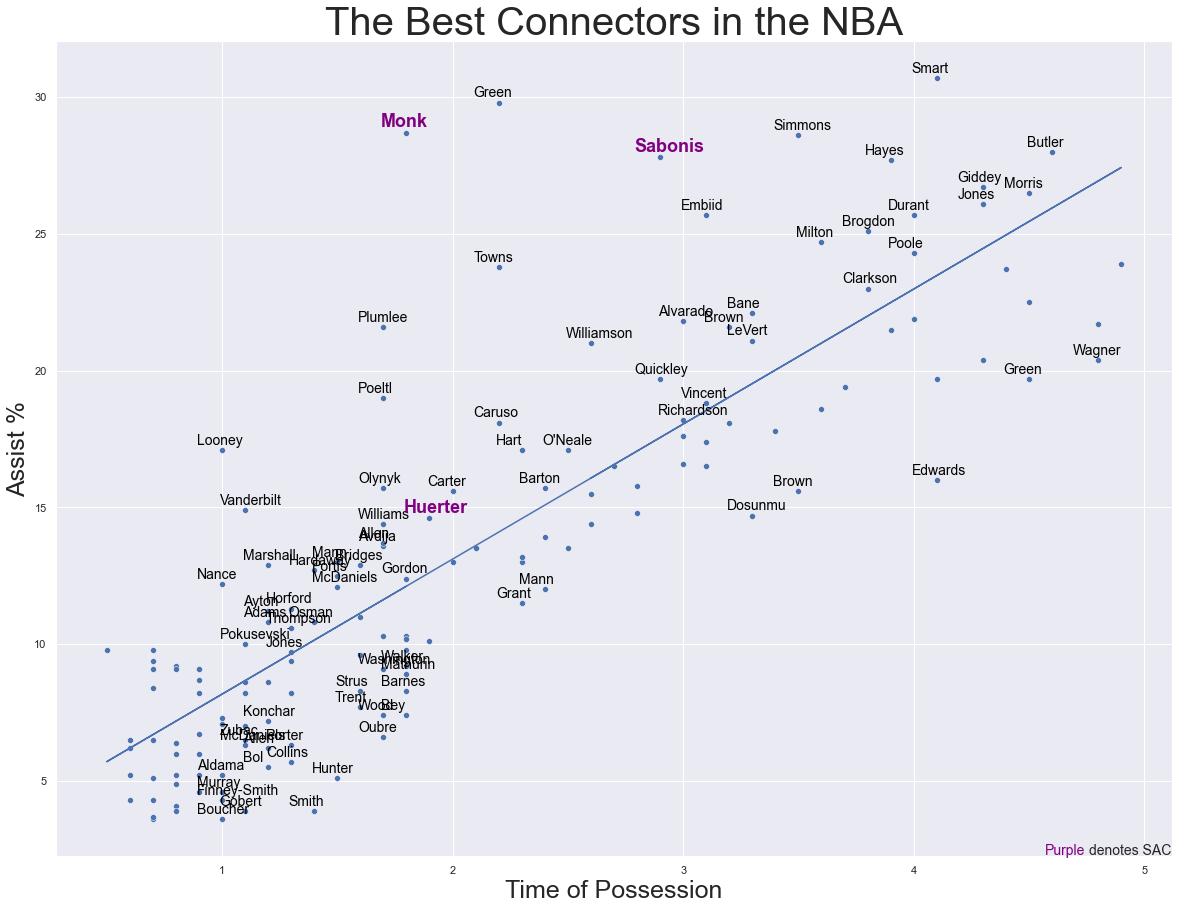

In [6]:
# Plotting scatterplot
plt.figure(figsize=(20,15))
sns.set_theme()
sns.scatterplot(data=connectors_df,x="TIME_OF_POSS",y="AST")

# Plotting line of best fit
x = connectors_df["TIME_OF_POSS"]
y = connectors_df["AST"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

# Highlighting Kings players
for i, player in enumerate(connectors_df["Player"]):
     if(connectors_df["TIME_OF_POSS"][i] >= 1 and connectors_df["TIME_OF_POSS"][i] <= 5 and (connectors_df["AST"][i] > 1 * (m*connectors_df["TIME_OF_POSS"][i] + b) or connectors_df["AST"][i] < 0.8 * (m*connectors_df["TIME_OF_POSS"][i] + b))):
        c = "black"
        fs=14
        weight = "normal"
        if(connectors_df["TEAM_ABBREVIATION"][i] == "SAC" and connectors_df["AST"][i] > 1 * (m*connectors_df["TIME_OF_POSS"][i] + b)):
            c = "purple"
            weight = "bold"
            fs = 18
        plt.text(connectors_df.TIME_OF_POSS[i] - 0.11, connectors_df["AST"][i] + 0.2, player.split()[1], color = c, fontsize=fs, weight = weight)   

# Labels
plt.xlabel('Time of Possession', fontsize = 25)
plt.ylabel('Assist %', fontsize = 25)
plt.title("The Best Connectors in the NBA", fontsize = 40)

plt.text(4.57, 2.3, "Purple", color = "purple", fontsize = 14)
plt.text(4.76, 2.3, "denotes SAC", fontsize = 14)

plt.show()